In [65]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
# Dataset and Train-Test function
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
# Classifactions sklearn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
# Classification Keras + Tensorflow
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
# TabPFNClassificaion
from tabpfn import TabPFNClassifier

##### Load Dataset

In [66]:
lfw_people = fetch_lfw_people(min_faces_per_person=53, resize=.4)
X, y = lfw_people.images, lfw_people.target
X.shape, y.shape

((1456, 50, 37), (1456,))

The shape show us that we have a dataset with 1456 images with a 50x37 pixel resolution

##### Positive-Negative Image

Text(0.5, 1.0, 'Negative class Image')

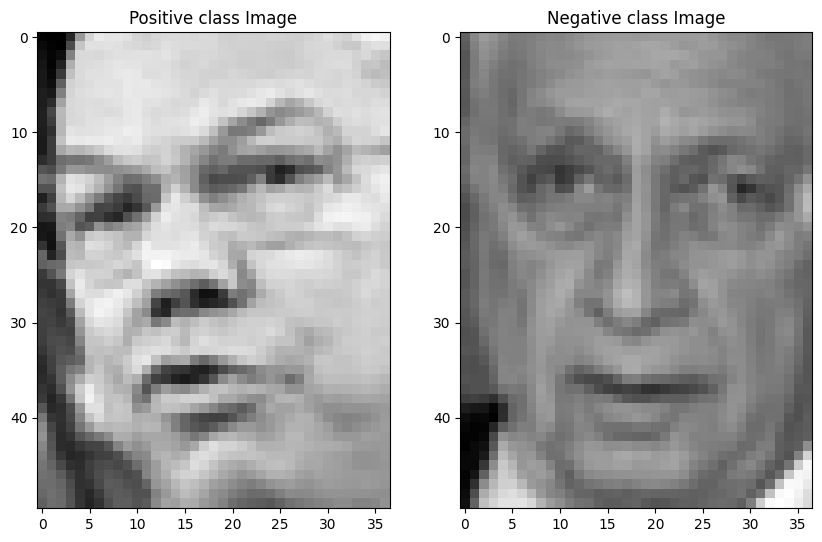

In [67]:
# Plot a positive and negative image for classifications purposes
plt.figure(figsize=(10,10))
# Positive
plt.subplot(1,2,1)
plt.imshow(X[y==1][0], cmap='gray')
plt.title('Positive class Image')
# Negative
plt.subplot(1,2,2)
plt.imshow(X[y==0][0], cmap='gray')
plt.title('Negative class Image')

In [68]:
# This will show us if we are ir [0,1] range or [0, 255]
np.min(X),np.max(X)

(0.0, 1.0)

As we can see, we don't have to normalize the images to [0, 1] range cause we already are in it

In [69]:
# We want to know how many people we have in the dataset to classify
len(np.unique(y))

10

### First dataset implementations

#### Data preprocessing

In [70]:
X_reshape = X.reshape((X.shape[0], -1 )) # Flatten image

labelEncoder = LabelEncoder()
y_encoded = labelEncoder.fit_transform(y)
X_reshape.shape, y_encoded.shape

((1456, 1850), (1456,))

#### Split the dataset

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_reshape, y_encoded, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1164, 1850), (292, 1850), (1164,), (292,))

#### Classifiers

##### SVC ( Support Vector Machines)

In [72]:
svm_classifier = SVC()

svm_classifier.fit(X_train, (y_train==1))

SVC()

In [73]:
y_pred = svm_classifier.predict(X_test)

print(f'Results:\nClassification-Report:\n{classification_report(y_test==1, y_pred)}')
print(f'\nConfusion-Matrix: \n{confusion_matrix(y_test==1, y_pred)}')
print(f'\nROC-AUC-Score: \n{roc_auc_score(y_test==1, y_pred)}')
print(f'\nAccuracy-Score: \n{accuracy_score(y_test==1, y_pred)}')

Results:
Classification-Report:
              precision    recall  f1-score   support

       False       0.94      1.00      0.97       246
        True       1.00      0.63      0.77        46

    accuracy                           0.94       292
   macro avg       0.97      0.82      0.87       292
weighted avg       0.95      0.94      0.94       292


Confusion-Matrix: 
[[246   0]
 [ 17  29]]

ROC-AUC-Score: 
0.8152173913043479

Accuracy-Score: 
0.9417808219178082


##### Logistic Regression 

In [74]:
logisticClassifier = LogisticRegression()

logisticClassifier.fit(X_train, (y_train==1))

LogisticRegression()

In [75]:
y_pred = logisticClassifier.predict(X_test)

print(f'Results:\nClassification-Report:\n{classification_report(y_test==1, y_pred)}')
print(f'\nConfusion-Matrix: \n{confusion_matrix(y_test==1, y_pred)}')
print(f'\nROC-AUC-Score: \n{roc_auc_score(y_test==1, y_pred)}')
print(f'\nAccuracy-Score: \n{accuracy_score(y_test==1, y_pred)}')

Results:
Classification-Report:
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       246
        True       0.86      0.83      0.84        46

    accuracy                           0.95       292
   macro avg       0.92      0.90      0.91       292
weighted avg       0.95      0.95      0.95       292


Confusion-Matrix: 
[[240   6]
 [  8  38]]

ROC-AUC-Score: 
0.9008483563096501

Accuracy-Score: 
0.952054794520548


##### Neural Network

In [99]:
neuralModelo = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
neuralModelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
neuralModelo.summary()

/Users/alejandro/Documents/Repositorios/DMandML/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 128)            │       236,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,353 (970.13 KB)

 Trainable params: 248,353 (970.13 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
history = neuralModelo.fit(X_train, (y_train==1), epochs=100, batch_size=32, validation_split=.2)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8395 - loss: 0.4860 - val_accuracy: 0.8197 - val_loss: 0.4732
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8582 - loss: 0.3893 - val_accuracy: 0.8197 - val_loss: 0.4367
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8286 - loss: 0.4167 - val_accuracy: 0.8197 - val_loss: 0.3753
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8569 - loss: 0.3212 - val_accuracy: 0.8197 - val_loss: 0.4910
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8656 - loss: 0.3728 - val_accuracy: 0.9013 - val_loss: 0.3419
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8819 - loss: 0.3050 - val_accuracy: 0.8197 - val_loss: 0.5064
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8572 - loss: 0.3787 - val_accuracy: 0.9099 - val_loss: 0.2517
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9044 - loss: 0.2407 - val_accuracy: 0.9056 - v

In [102]:
y_pred_neural = neuralModelo.predict(X_test).astype(int)

print(f'Results:\nClassification-Report:\n{classification_report(y_test==1, y_pred_neural)}')
print(f'\nConfusion-Matrix: \n{confusion_matrix(y_test==1, y_pred_neural)}')
print(f'\nROC-AUC-Score: \n{roc_auc_score(y_test==1, y_pred_neural)}')
print(f'\nAccuracy-Score: \n{accuracy_score(y_test==1, y_pred_neural)}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Results:
Classification-Report:
              precision    recall  f1-score   support

       False       0.84      1.00      0.91       246
        True       0.00      0.00      0.00        46

    accuracy                           0.84       292
   macro avg       0.42      0.50      0.46       292
weighted avg       0.71      0.84      0.77       292


Confusion-Matrix: 
[[246   0]
 [ 46   0]]

ROC-AUC-Score: 
0.5

Accuracy-Score: 
0.8424657534246576


/Users/alejandro/Documents/Repositorios/DMandML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alejandro/Documents/Repositorios/DMandML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alejandro/Documents/Repositorios/DMandML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

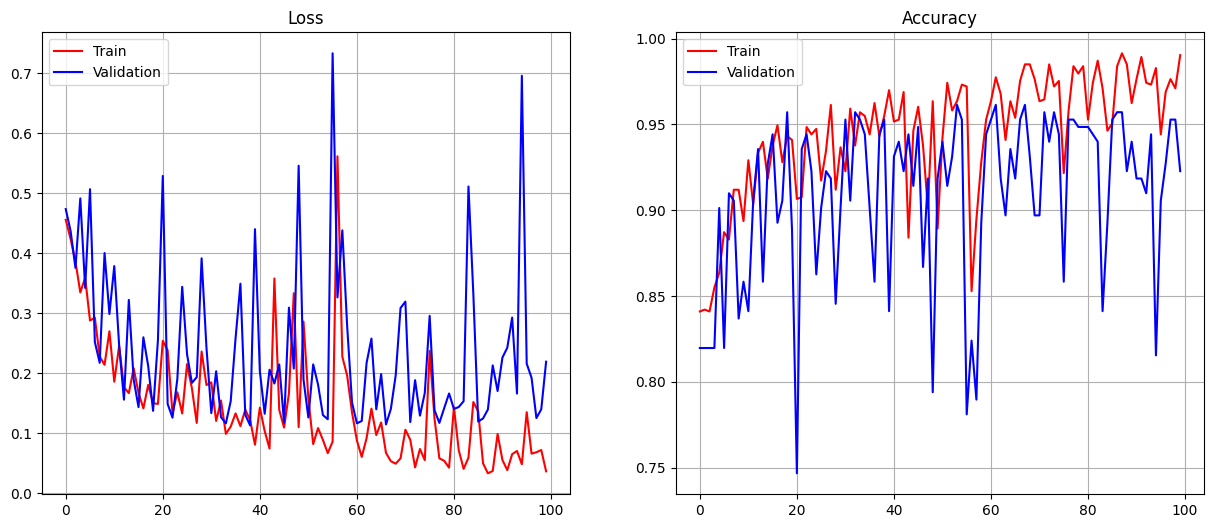

In [103]:
plt.figure(figsize=(15,6))
# Subplot for loss 
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train', c='red')
plt.plot(history.history['val_loss'], label='Validation', c='blue')
plt.title('Loss')
plt.grid(True)
plt.legend()
# Subplot for accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train', c='red')
plt.plot(history.history['val_accuracy'], label='Validation', c='blue')
plt.title('Accuracy')
plt.grid(True)
plt.legend()
plt.show()